In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import scipy.stats as stat
import pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
train=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\train_credit.csv")
test=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\test_credit.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
pd.crosstab(train['Credit_Product'],train['Is_Lead'],margins=True)

Is_Lead,0,1,All
Credit_Product,,,
No,133734,10623,144357
Yes,49353,22690,72043
All,183087,33313,216400


In [7]:
pd.crosstab(train['Gender'],train['Is_Lead'],margins=True)

Is_Lead,0,1,All
Gender,,,
Female,88823,22705,111528
Male,98614,35583,134197
All,187437,58288,245725


In [8]:
pd.crosstab(train['Occupation'],train['Is_Lead'],margins=True)

Is_Lead,0,1,All
Occupation,,,
Entrepreneur,905,1762,2667
Other,52984,17189,70173
Salaried,60503,11496,71999
Self_Employed,73045,27841,100886
All,187437,58288,245725


In [9]:
pd.crosstab(train['Occupation'],train['Credit_Product'],margins=True)

Credit_Product,No,Yes,All
Occupation,,,
Entrepreneur,2,1649,1651
Other,39425,21421,60846
Salaried,52423,15360,67783
Self_Employed,52507,33613,86120
All,144357,72043,216400


### Data Cleansing

In [10]:
train=train.drop(['ID'],axis=1)
test=test.drop(['ID'],axis=1)

In [11]:
train=train.drop(['Region_Code'],axis=1)
test=test.drop(['Region_Code'],axis=1)

In [12]:
train['Channel_Code']=train['Channel_Code'].str.replace('X','')
test['Channel_Code']=test['Channel_Code'].str.replace('X','')

In [13]:
train['Gender']=train['Gender'].map({'Male':0,'Female':1})
test['Gender']=test['Gender'].map({'Male':0,'Female':1})

In [14]:
train['Occupation']=train['Occupation'].map({'Salaried':1,'Self_Employed':2,'Entrepreneur':3,'Other':4})
test['Occupation']=test['Occupation'].map({'Salaried':1,'Self_Employed':2,'Entrepreneur':3,'Other':4})

In [15]:
train['Is_Active']=train['Is_Active'].map({'No':0,'Yes':1})
test['Is_Active']=test['Is_Active'].map({'No':0,'Yes':1})

### Missing Value Imputation

In [16]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [17]:
train['Credit_Product'].fillna(train['Credit_Product'].mode()[0],inplace=True)
test['Credit_Product'].fillna(test['Credit_Product'].mode()[0],inplace=True)

In [18]:
train['Credit_Product']=train['Credit_Product'].map({'No':0,'Yes':1})
test['Credit_Product']=test['Credit_Product'].map({'No':0,'Yes':1})

In [19]:
train['Credit_Product'].value_counts()

0    173682
1     72043
Name: Credit_Product, dtype: int64


### Feature Transformation

In [20]:
def feature_plot(df,feature):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

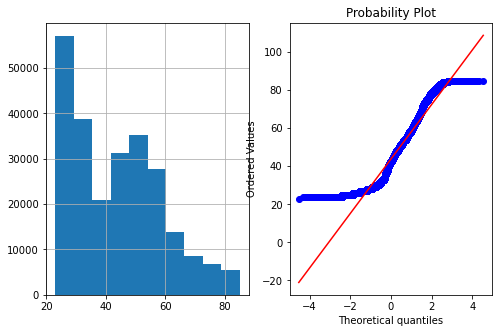

In [21]:
feature_plot(train,"Age")

C:\Users\Avirup\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


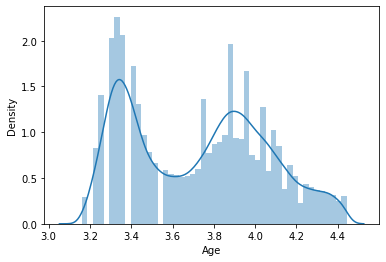

In [22]:
train['Age']=np.log(train['Age'])
test['Age']=np.log(test['Age'])
sea.distplot(train['Age'])
plt.show()

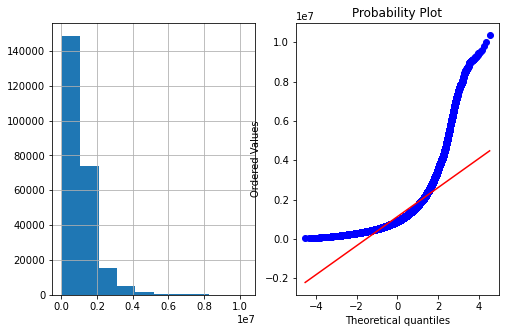

In [23]:
feature_plot(train,"Avg_Account_Balance")

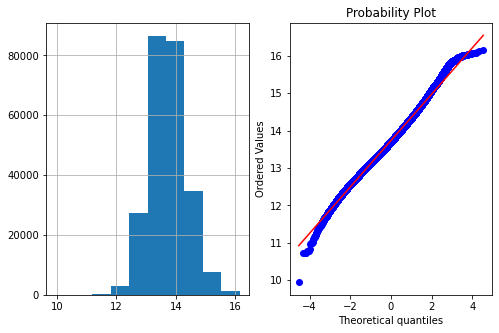

C:\Users\Avirup\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


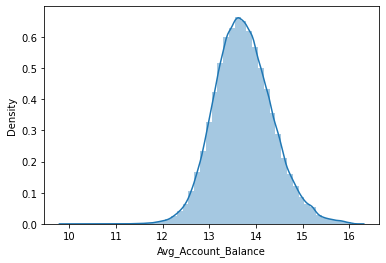

In [24]:
train['Avg_Account_Balance']=np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance']=np.log(test['Avg_Account_Balance'])
feature_plot(train,"Avg_Account_Balance")
sea.distplot(train['Avg_Account_Balance'])
plt.show()

<AxesSubplot:>

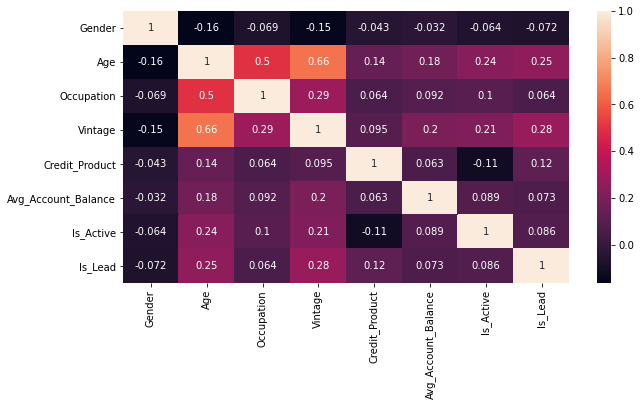

In [25]:
corr=train.corr()
plt.figure(figsize=(10,5))
sea.heatmap(corr,annot=True)

### Model Building

In [26]:
X=train.drop(['Is_Lead'],axis=1)
Y=train['Is_Lead']

In [27]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [28]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,Y_train)
predict=rf.predict(X_val)

### Evaluation Metrics

In [29]:
print(accuracy_score(Y_val,predict))
print(confusion_matrix(Y_val,predict))
print(classification_report(Y_val,predict))

0.7595075796113542
[[33294  4078]
 [ 7741  4032]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     37372
           1       0.50      0.34      0.41     11773

    accuracy                           0.76     49145
   macro avg       0.65      0.62      0.63     49145
weighted avg       0.74      0.76      0.74     49145



### AUC Score

In [30]:
r_probs=[0 for _ in range(len(Y_val))]
rf_probs=rf.predict_proba(X_val)
rf_probs=rf_probs[:,1]

In [31]:
r_auc=roc_auc_score(Y_val,rf_probs)
rf_auc=roc_auc_score(Y_val,rf_probs)
print(rf_auc)

0.7414394364736426


### ROC Curve

In [32]:
r_FPR,r_TPR,_=roc_curve(Y_val,r_probs)
rf_FPR,rf_TPR,_=roc_curve(Y_val,rf_probs)

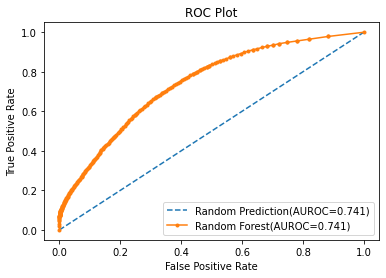

In [33]:
plt.plot(r_FPR,r_TPR,linestyle='--',label='Random Prediction(AUROC=%0.3f)'%r_auc)
plt.plot(rf_FPR,rf_TPR,marker='.',label='Random Forest(AUROC=%0.3f)'%rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
pred_test=rf.predict(test)
sub=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\sample_submission_eyYijxG.csv")
sub.set_index('ID',inplace=True)
sub['Is_Lead']=pred_test

In [35]:
pd.DataFrame(sub).to_csv('Credit_Prediction.csv')